<a href="https://colab.research.google.com/github/Aggeliki-Mentzini/Home-Credit-Default-Risk-Kaggle/blob/main/main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#numpy and pandas for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')


import sys

# File system management
import os


#sklearn preprocessing for dealing with categorical variables
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from  sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import missingno as msno

Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving application_test.csv to application_test.csv


In [3]:
application_test = pd.read_csv('application_test.csv')
print('Testing data shape',application_test.shape)

Testing data shape (48744, 121)


In [4]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from google.colab import files
uploaded = files.upload()

Saving application_train.csv to application_train.csv


In [6]:
application_train = pd.read_csv('application_train.csv')
print('Training data shape',application_train.shape)

Training data shape (307511, 122)


In [7]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Data Cleaning and Preprocessing
* Handle missing values (e.g., median imputation or removing nulls).
* Normalize numerical data (e.g., income, loan amount).
* Encode categorical variables (e.g., one-hot encoding for employment type).
* Identify and address outliers using statistical methods (e.g., z-scores, IQR).

**Examine the distribution of the Targer Column**

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [8]:
application_train['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


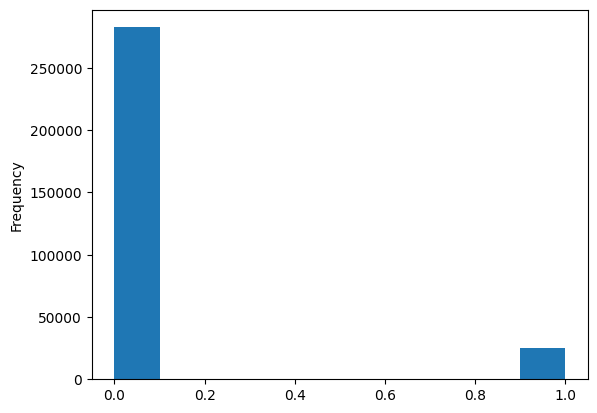

In [9]:
application_train['TARGET'].astype(int).plot.hist();

--> Imbalanced class problem -->
repaid loans >>> not repaid loans

later on we will reflect this inbalance

**Cleaning the data section**

**1. Handling Missing Values**

In [10]:
#function to calculate missing values by column

def missing_values_table(df):
  #total missing values
  mis_val=df.isnull().sum()

  #percentage of missing values
  mis_val_percent=100*df.isnull().sum()/len(df)

  #a table with the results
  mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)

  #rename the columns
  mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})

  #sort the table by percentage of missing descending
  mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)

  #print some summary information
  print('Your selected dataframe has '+str(df.shape[1])+' columns.\n'
        'There are '+str(mis_val_table_ren_columns.shape[0])+' columns that have missing values.')

  #return the dataframe with missing information
  return mis_val_table_ren_columns



In [11]:
#Missing values statistics
missing_values=missing_values_table(application_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [20]:
# Separate columns by data type
numerical_cols = application_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = application_train.select_dtypes(include=['object', 'category']).columns

for col in numerical_cols:
    application_train[col] = application_train[col].fillna(application_train[col].mean())

In [22]:
for col in categorical_cols:
    application_train[col] = application_train[col].fillna(application_train[col].mode()[0])

*mode* is used to replace missing values in a categorical column with the mode (the most frequent value) of that column. The mode() function returns a Series containing the most frequent values, and [0] is used to get the first (and usually the only) mode value.

In [23]:
missing_values=missing_values_table(application_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


When we start building our machine learning models, we'll need to address the issue of missing values through a process called **imputation**. However, some models, like **XGBoost**, *can work directly with missing data without requiring imputation*. Alternatively, we could choose to remove columns that have a large proportion of missing values, but it's difficult to predict in advance whether those columns might be valuable for our model. For this reason, we’ll retain all columns for now.

In [12]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
application_train.dtypes.value_counts()

,count
float64,65
int64,41
object,16


In [14]:
#Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


**Why This Is Useful**




*   **Understanding Data Structure:** It’s important to know how many unique categories exist in each categorical feature. For instance, if a column has 50 unique values (e.g., "states" or "products"), it may be handled differently than a column with just two categories (e.g., "Yes"/"No").

*   **Preparing for Encoding:** Many machine learning models require numerical inputs. Knowing the number of unique categories helps you choose the right encoding method. For example:

1.   *Binary or Label Encoding* is suitable for categorical variables with only two unique values.
2.   *One-Hot Encoding* is commonly used for categorical variables with a manageable number of unique values.
3.  *Target Encoding or Embedding Layers* may be better if there are many unique categories, as one-hot encoding can create a large number of columns.



*   **Feature Engineering Decisions:** By knowing the number of unique categories, you can decide whether to group certain categories together (e.g., grouping rare categories) or whether to drop features that have too many unique values and are unlikely to be useful.


*   **Data Quality Checks:** Checking the unique values can help identify inconsistencies in the data, such as typos or duplicated categories. For example, "USA," "United States," and "US" might all represent the same category but would appear as separate unique values.



In [ ]:
#we have loades the data about application(test+train)

#We gonna split them in 2 subsets

# Training Set: This is the portion of the dataset that
# is used to train the machine learning model.
# The model learns patterns from  this data.


# Test Set: This subset is used to evaluate the model's performance
# after training. It allows you to check if the model is able to generalize
# well to unseen data. The test set should not be used during model training,
# ensuring an unbiased evaluation.



X=application_train.drop('TARGET',axis=1)
y=application_train['TARGET']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify = y)

#stratify=y: This argument ensures that the target variable's distribution
# is preserved across both the training and testing sets.

#Without it, you might get inconsistent results that are difficult to interpret
# or compare ensuring that these random processes produce the same result every
# time you run the code

In [ ]:
# Splitting Data into Numerical and Categorical Columns

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [ ]:
print(numerical_cols)
print(categorical_cols)

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [ ]:
# Pipeline: A pipeline allows you to chain together multiple data processing steps in a linear sequence, ensuring that each step is applied in order.
# It helps to keep your code clean and reusable.

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_transformer= Pipeline(
    steps=[
        (
            'imputer', SimpleImputer(strategy='mean')
            #SimpleImputer: This is used to fill in missing values in your dataset.
            # Here, it's set to replace missing values with the mean of each numerical feature.
            #This is useful for handling missing data.
        ),
        (
            'scaler', StandardScaler()
            #StandardScaler: This standardizes the numerical features by removing
            #the mean and scaling to unit variance.
            #This is a common step to normalize numerical data, especially before
            #applying machine learning algorithms that are sensitive to feature scale
            #(e.g., logistic regression, support vector machines).
        )
    ]
)


#steps: This is a list of steps in the pipeline. Each step is a tuple consisting of:
# A name (e.g., 'imputer', 'scaler').
# A transformer or model (e.g., SimpleImputer, StandardScaler).





In [ ]:
categorical_transformer=Pipeline(
    steps=[
        (
            'imputer', SimpleImputer(strategy='most_frequent')
            #SimpleImputer: For categorical features, missing values
            #are replaced with the most frequent value in the column.
        ),
        (
            'onehot', OneHotEncoder(handle_unknown='ignore')
            #OneHotEncoder: This encodes categorical variables into binary columns
            #(e.g., if a feature has three categories: A, B, and C, it will create three new columns, one for each category, with 1s and 0s).

            #handle_unknown='ignore': This argument ensures that if a category is encountered in the test
            #data that wasn't present in the training data, it will be ignored rather than throwing an error.
        )
    ]
)

In [ ]:
# ColumnTransformer() : It ensures that the appropriate transformations are applied to each column based on its data type.

preprocessor= ColumnTransformer(
    transformers=[
        (
            'num',numerical_transformer,numerical_cols
            #This specifies that the numerical_transformer pipeline should be applied to the columns listed in numerical_cols.
        ),
        (
            'cat',categorical_transformer,categorical_cols
            #Similarly, the categorical_transformer pipeline is applied to the columns listed in categorical_cols.

        )
    ]
)

In [ ]:
# Defining Pipeline

#The Pipeline in scikit-learn is a tool used to streamline multiple steps of preprocessing and modeling
#into a single object. It allows you to chain together multiple steps, making your workflow cleaner and easier to manage.
#Each step in the pipeline must be a transformer or an estimator (a model).

pipeline=Pipeline(
    steps=[
        (
            'preprocessor',preprocessor
        ),
        (
            'classifier', RandomForestClassifier(n_estimators=200, random_state=10,verbose=1,n_jobs=-1)
        )
    ]
)

#Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

In [ ]:
# Fitting and Evaluating the Logistic Regression Model

pipeline.fit(X_train,y_train)

train_score=pipeline.score(X_train,y_train)
test_score=pipeline.score(X_test,y_test)

print('Train Score:',train_score)
print('Test Score:',test_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   15.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   15.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s


Train Score: 1.0
Test Score: 0.9192722306228964


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.0s finished
